# Data Wrangling

## The proces of coverting data from the initial format to a format that may be better for analysis

In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]


data = pd.read_csv('data/imports.csv', names = headers)

#data.dtypes

In [2]:
data.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


Deal with missing data

In [3]:
data.replace("?", np.nan, inplace = True)

data.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [8]:
#data.isnull().values.any()
missing_data = data.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

How to deal with missing data?
drop data
a. drop the whole row
b. drop the whole column
replace data
a. replace it by mean
b. replace it by frequency
c. replace it based on other functions

In [5]:
average_norm_loss = data["normalized-losses"].astype("float").mean(axis=0)
print("Avarage of normalized-losses ", average_norm_loss)
data["normalized-losses"].replace(np.nan, average_norm_loss, inplace=True)

Avarage of normalized-losses  122.0


In [6]:
average_bore = data["bore"].astype("float").mean(axis=0)
print("Avarage of bore: ", average_bore)
data["bore"].replace(np.nan, average_bore, inplace = True)

Avarage of bore:  3.3297512437810957


In [25]:
average_horsepower = data["horsepower"].astype("float").mean(axis=0)
print("Avarage of horse power: ", average_horsepower)
data["horsepower"].replace(np.nan, average_horsepower, inplace = True)

ValueError: could not convert string to float: '?'

In [9]:
average_peak_rpm = data["peak-rpm"].astype("float").mean(axis=0)
print("Avarage of peak-rpm: ", average_peak_rpm)
data["peak-rpm"].replace(np.nan, average_peak_rpm, inplace = True)

Avarage of peak-rpm:  5125.369458128079


In [10]:
data["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [11]:
data["num-of-doors"].value_counts().idxmax()

'four'

In [12]:
data["num-of-doors"].replace(np.nan, "four", inplace=True)

In [13]:
# drop whole row with NaN in price column
data.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
data.reset_index(drop=True, inplace=True)

data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Correct data format

In [38]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [42]:
data[["bore", "stroke"]] = data[["bore", "stroke"]].astype("float")
data[["normalized-losses"]] = data[["normalized-losses"]].astype("int")
data[["price"]] = data[["price"]].astype("float")
data[["peak-rpm"]] = data[["peak-rpm"]].astype("float")

In [20]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
Data Standardization

Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation

Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison

In [31]:
data['city-L/100km'] = 235/data["city-mpg"]
data.rename(columns={'city-mpg':'city-L/100km'}, inplace=True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,city-L/100km
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,11.190476
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,11.190476
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,13.055556


Data Normalization

The process of transforming values of several variables into a similar range

In [16]:
data['length'] = data['length']/data['length'].max()
data['width'] = data['width']/data['width'].max()
data['height'] = data['height']/data['height'].max()

Binning

The process of transforming continuous numerical variables into discrete categorical 'bins', for groupes anlysis

Text(0.5, 1.0, 'wheel-base bins')

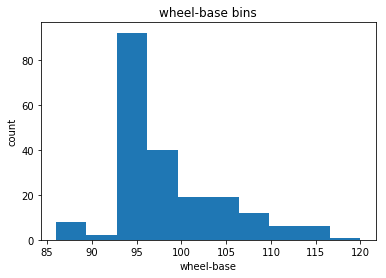

In [42]:
data["wheel-base"] = data["wheel-base"].astype(int, copy=True)

plt.pyplot.hist(data["wheel-base"])

plt.pyplot.xlabel("wheel-base")
plt.pyplot.ylabel("count")
plt.pyplot.title("wheel-base bins")

In [49]:
start_value = min(data['wheel-base'])
end_value = max(data['wheel-base'])
number_generated = 4

bins = np.linspace(start_value, end_value, number_generated)

group_names = ['low', 'medium', 'high']

data['wheel-base-binned'] = pd.cut(data['wheel-base'], bins, labels=group_names, include_lowest=True)

data[['wheel-base', 'wheel-base-binned']].head()

,wheel-base,wheel-base-binned
0,88,low
1,88,low
2,94,low
3,99,medium
4,99,medium


Text(0.5, 1.0, 'Wheel base bins')

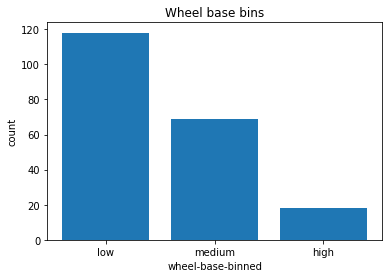

In [54]:
pyplot.bar(group_names, data['wheel-base-binned'].value_counts())

plt.pyplot.xlabel("wheel-base-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("Wheel base bins")

Text(0.5, 1.0, 'Wheel base bins')

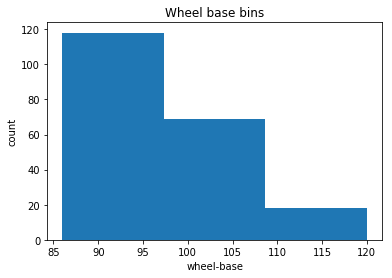

In [59]:
plt.pyplot.hist(data['wheel-base'], bins=3)

plt.pyplot.xlabel("wheel-base")
plt.pyplot.ylabel("count")
plt.pyplot.title("Wheel base bins")

Indicator variable (or dummy variable)

Numerical variable used to label categories. They are called dummies because the number themselves don't have inherent meaning.



In [60]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'wheel-base-binned'],
      dtype='object')

In [63]:
dummy_variable = pd.get_dummies(data['fuel-type'])
dummy_variable.head(5)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [64]:
dummy_variable.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [66]:
data = pd.concat([data, dummy_variable], axis=1)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,wheel-base-binned,diesel,gas,diesel,gas
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88,...,111,5000,21,27,13495,low,0,1,0,1
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88,...,111,5000,21,27,16500,low,0,1,0,1
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94,...,154,5000,19,26,16500,low,0,1,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99,...,102,5500,24,30,13950,medium,0,1,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99,...,115,5500,18,22,17450,medium,0,1,0,1


In [ ]:
#data.drop('fuel-type', axis=1, inplace=True)
data.head()

In [70]:
data.to_csv('clean_data.csv')